<a href="https://colab.research.google.com/github/Abinash-bit/fault-analysis-randomforest/blob/master/Fault_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
dataset = pd.read_csv("/content/cg modified2.csv")

In [33]:
dataset.head()

,Time,absolute Ia,absolute Ib,absolute Ic,Fault
0,0.000000,0.013287,0.193807,0.161796,Yes
1,0.000167,0.019501,0.195076,0.158091,Yes
2,0.000333,0.025686,0.195642,0.153782,Yes
3,0.000500,0.031827,0.195499,0.148871,Yes
4,0.000667,0.037908,0.194641,0.143365,Yes


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6000 non-null   float64
 1   absolute Ia  6000 non-null   float64
 2   absolute Ib  6000 non-null   float64
 3   absolute Ic  6000 non-null   float64
 4   Fault        6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [35]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,6000.0,0.499897,0.288688,0.000000,0.249948,0.499897,0.749845,0.999793
absolute Ia,6000.0,0.069399,0.041104,0.000069,0.034359,0.070705,0.100124,0.274439
absolute Ib,6000.0,0.148052,0.087821,0.000235,0.084729,0.151917,0.191680,0.475925
absolute Ic,6000.0,0.165126,0.152973,0.000180,0.079298,0.139315,0.171275,0.905010


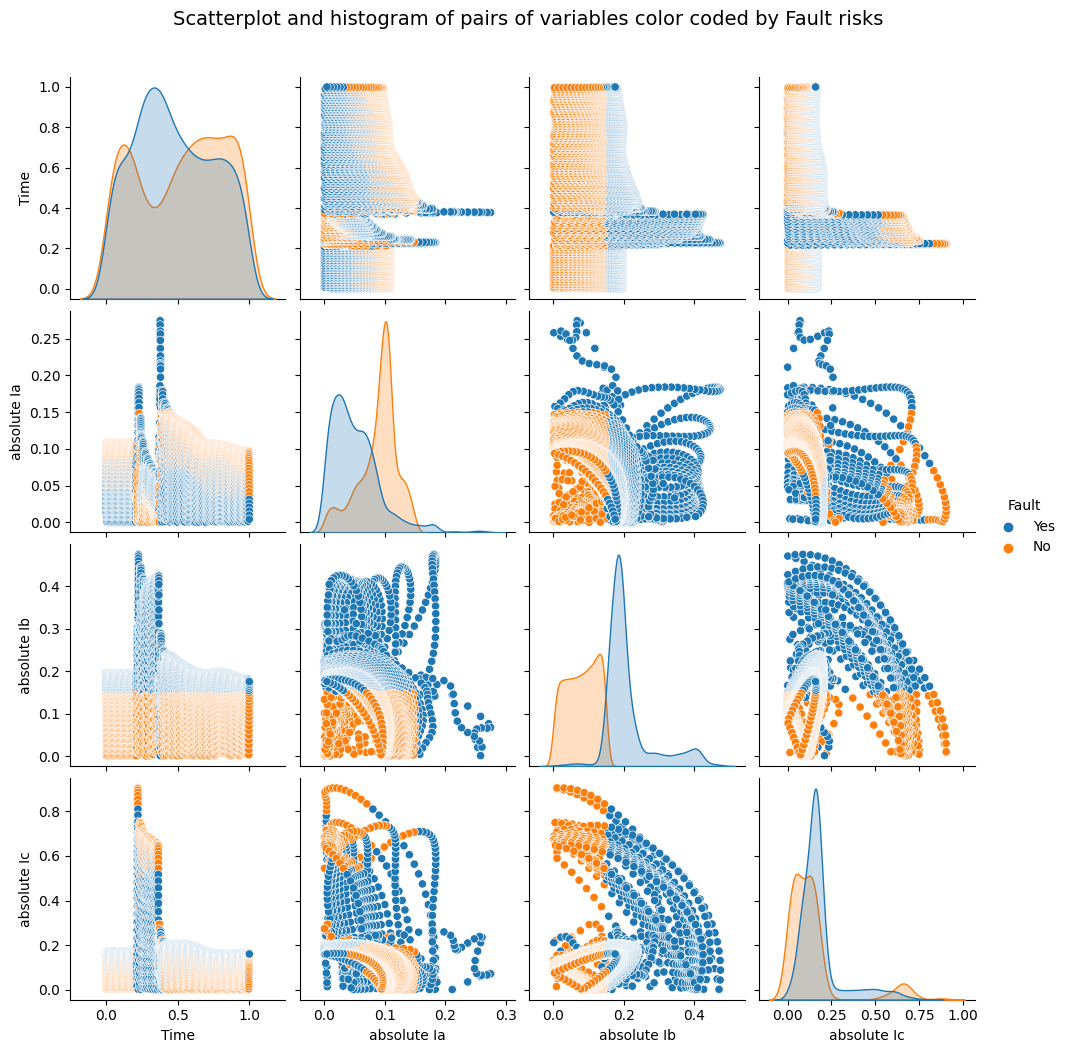

In [36]:
g = sns.pairplot(dataset, hue='Fault')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by Fault risks",
               fontsize = 14,
               y=1.05);

In [37]:
dataset['Fault'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dataset['Fault'] = dataset['Fault'].replace('No', 0).replace('Yes', 1)

In [39]:
y = dataset['Fault']
X = dataset.drop(['Fault'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=SEED)

In [42]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


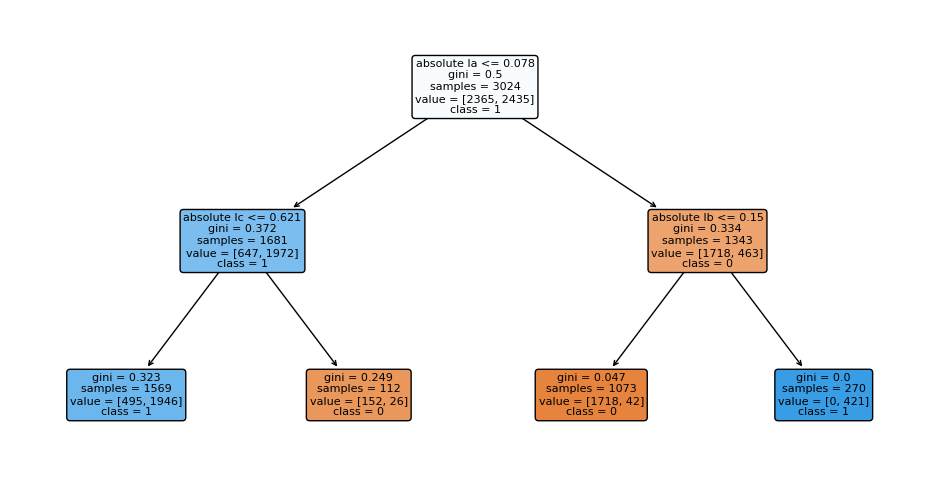

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


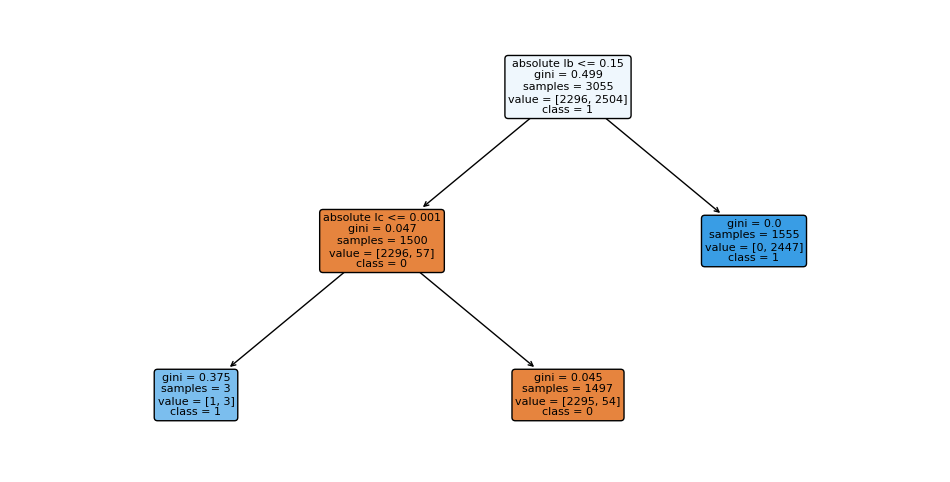

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


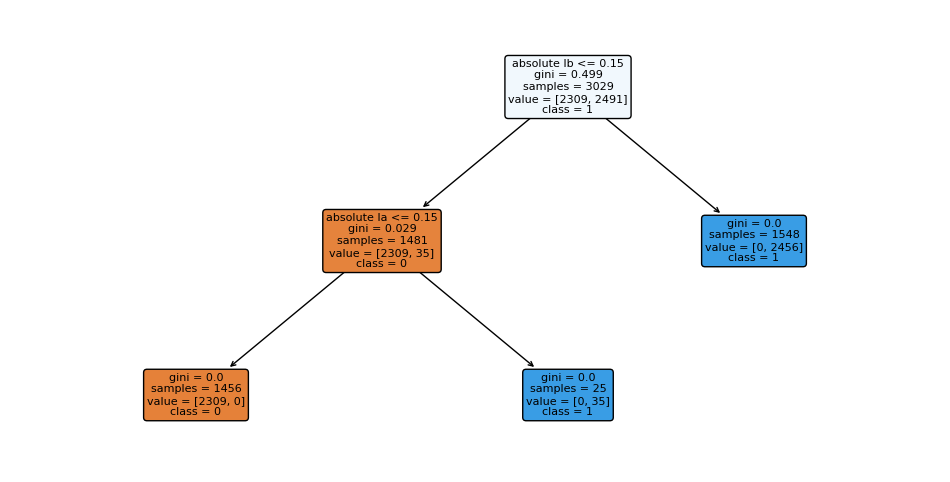

In [43]:
# Import `tree` module
from sklearn import tree

features = X.columns.values
classes = ['0', '1']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       557
           1       1.00      0.98      0.99       643

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



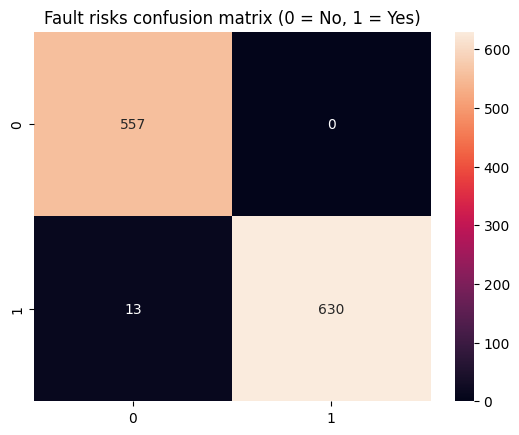

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Fault risks confusion matrix (0 = No, 1 = Yes)')

print(classification_report(y_test,y_pred))

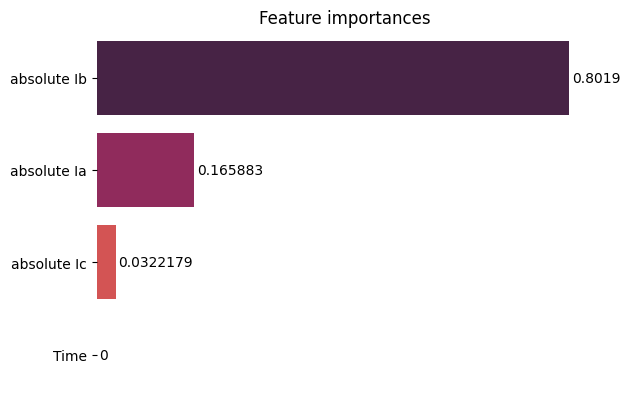

In [46]:

features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })


features_df_sorted = features_df.sort_values(by='importances', ascending=False)


g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [47]:
rfc_ = RandomForestClassifier(n_estimators=900,
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00       643

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



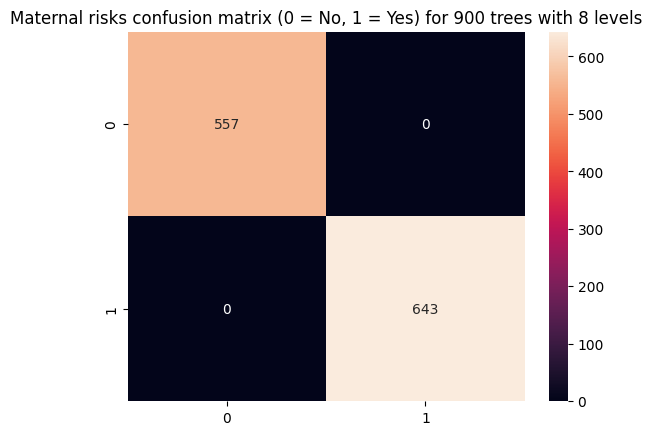

In [48]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = No, 1 = Yes) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset = pd.read_csv("/content/cg modified2.csv")

In [54]:
dataset['Fault'] = dataset['Fault'].replace('No', 0).replace('Yes', 1)

In [55]:
y = dataset['Fault']
X = dataset.drop(['Fault'], axis=1)

In [56]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [57]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20,
                            max_depth=3,
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

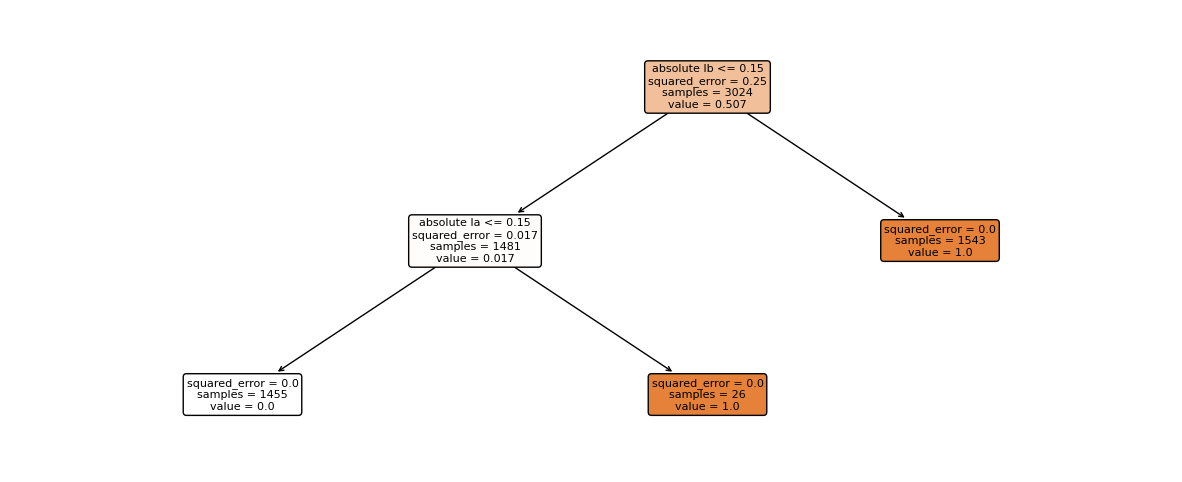

In [58]:
from sklearn import tree

features = X.columns

first_tree = rfr.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8,
               filled=True,
               rounded=True);

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.333333333333337e-05
Mean Squared Error: 4.16666666666667e-06
Root Mean Squared Error: 0.0020412414523193157
